In [15]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [10]:
data = pd.read_csv('new_appdata10.csv')

In [11]:
y = data["enrolled"]
X = data.drop(["enrolled",'user'],axis=1)

In [21]:
sc_X = StandardScaler()
X2 = pd.DataFrame(sc_X.fit_transform(X),index=X.index,columns=X.columns)
X2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,-0.014695,-1.419363,-0.807572,-0.387567,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.213951,-0.259709,-0.762022,-0.288619,0.312345
1,1.461700,-1.553808,-0.715007,-0.514723,-0.347635,-0.455805,-0.444528,0.965089,1.550903,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.330634,-0.259709,-0.762022,-0.288619,0.312345
2,-0.998958,0.866198,-0.807572,-1.150505,-0.347635,2.193918,2.249579,-1.036174,-0.644786,-1.050472,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-1.692095,-0.259709,-0.762022,-0.288619,0.312345
3,0.477437,0.462864,-0.344746,1.201889,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.058341,-0.259709,1.702048,-0.288619,0.312345
4,-0.998958,0.731753,-0.067050,0.693263,-0.347635,-0.455805,2.249579,-1.036174,1.550903,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,1.030828,-0.259709,0.880691,-0.288619,0.312345


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [23]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
39087,0.969568,0.731753,0.118080,4.126488,2.876581,-0.455805,2.249579,0.965089,1.550903,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.213951,-0.259709,2.523405,-0.288619,1.788458
30893,-0.014695,1.000643,-1.362963,-0.260410,-0.347635,-0.455805,2.249579,0.965089,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.213951,-0.259709,-0.762022,-0.288619,-1.163767
45278,-0.014695,1.403977,1.506557,-0.769036,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,-1.050472,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-1.147511,1.874768,-0.762022,-0.288619,-1.163767
16398,-0.014695,-1.150474,-0.807572,-0.514723,-0.347635,2.193918,2.249579,0.965089,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.486243,-0.259709,-0.762022,-0.288619,-1.163767
13653,-1.491090,-1.284918,-0.715007,-0.387567,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.602926,-0.259709,-0.762022,-0.288619,-1.163767


In [25]:
classifier = LogisticRegression(random_state = 87, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=87)

In [26]:
y_pred = classifier.predict(X_test)


ac 0.7729
ps 0.7625050020008003
rs 0.7785495403472932
f1 0.7704437481047205


<AxesSubplot:>

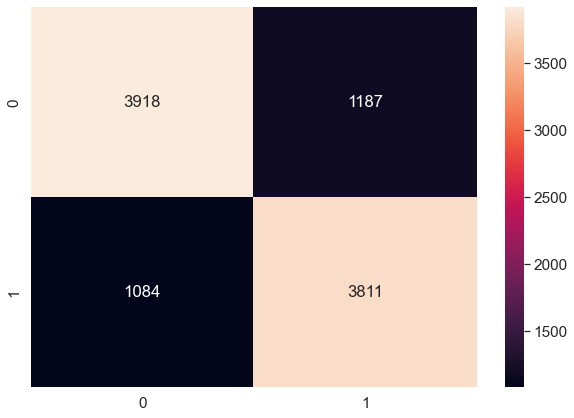

In [30]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred) # tp / (tp + fp)
rs = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

print('ac',ac)
print('ps',ps)
print('rs',rs)
print('f1',f1)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

In [31]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.766 (+/- 0.016)


In [33]:
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C, penalty=penalty)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\line

(0.7661, {'C': 0.1, 'penalty': 'l2'})